In [2]:
import os
from Bio import PDB
import numpy as np
import matplotlib.pyplot as plt

RMSD for 1V48_HA1_holo_aligned_esmfold_protein.pdb: 12.6971
RMSD for 1YGC_905_holo_aligned_esmfold_protein.pdb: 13.7825
RMSD for 1HQ2_PH2_holo_aligned_esmfold_protein.pdb: 2.0127
RMSD for 1S19_MC9_holo_aligned_esmfold_protein.pdb: 4.8605
RMSD for 1OF6_DTY_holo_aligned_esmfold_protein.pdb: 60.8048
RMSD for 1IG3_VIB_holo_aligned_esmfold_protein.pdb: 11.5729
RMSD for 1T40_ID5_holo_aligned_esmfold_protein.pdb: 2.1213
RMSD for 1Z95_198_holo_aligned_esmfold_protein.pdb: 3.0582
RMSD for 1M2Z_DEX_holo_aligned_esmfold_protein.pdb: 44.5918
RMSD for 1LPZ_CMB_holo_aligned_esmfold_protein.pdb: 2.2401
RMSD for 1P62_GEO_holo_aligned_esmfold_protein.pdb: 8.0291
RMSD for 1OQ5_CEL_holo_aligned_esmfold_protein.pdb: 4.8520
RMSD for 1GM8_SOX_holo_aligned_esmfold_protein.pdb: 3.5450
RMSD for 1KZK_JE2_holo_aligned_esmfold_protein.pdb: 23.8917
RMSD for 1UNL_RRC_holo_aligned_esmfold_protein.pdb: 64.0912
RMSD for 1K3U_IAD_holo_aligned_esmfold_protein.pdb: 6.2721
RMSD for 1J3J_CP6_holo_aligned_esmfold_protein.pd

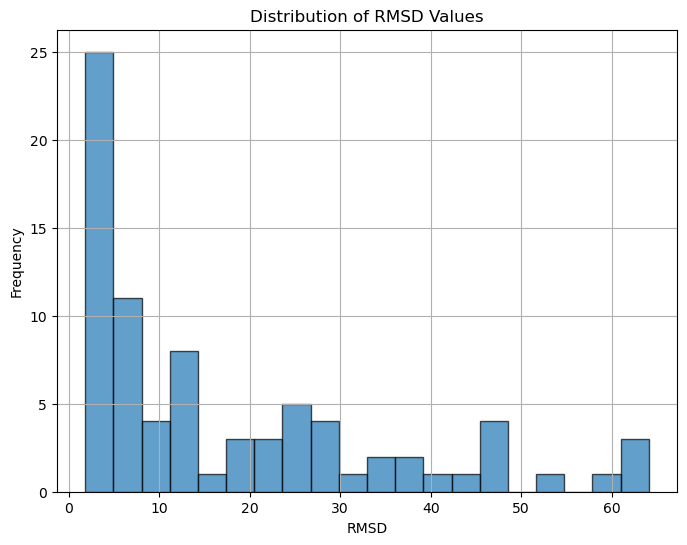

In [6]:
import os
from Bio import PDB
import numpy as np
import matplotlib.pyplot as plt

def calculate_rmsd(structure1, structure2):
    """
    Calculates the RMSD between two structures.
    """
    coords1 = []
    coords2 = []

    for atom1, atom2 in zip(structure1.get_atoms(), structure2.get_atoms()):
        coords1.append(atom1.coord)
        coords2.append(atom2.coord)

    coords1 = np.array(coords1)
    coords2 = np.array(coords2)

    if coords1.shape != coords2.shape:
        raise ValueError("Structures do not have the same number of atoms")

    diff = coords1 - coords2
    rmsd = np.sqrt(np.mean(np.sum(diff ** 2, axis=1)))
    return rmsd

def load_structure(file_path):
    """
    Loads a PDB structure using Biopython's PDB parser.
    """
    parser = PDB.PDBParser(QUIET=True)
    return parser.get_structure('', file_path)

def extract_prefix(filename):
    """
    Extracts the common prefix from a predicted filename to map it to the true structure.
    For example, '1G9V_RQ3_holo_aligned_esmfold_protein.pdb' becomes '1G9V_RQ3'.
    """
    return filename.split('_holo')[0]

def compute_rmsd_for_all(predicted_dir, true_dir):
    """
    Computes RMSD for all predicted and true protein structures.
    """
    rmsd_results = []

    for predicted_file in os.listdir(predicted_dir):
        if predicted_file.endswith(".pdb"):
            prefix = extract_prefix(predicted_file)
            predicted_path = os.path.join(predicted_dir, predicted_file)
            true_file = f"{prefix}_protein.pdb"
            true_path = os.path.join(true_dir, true_file)

            if os.path.exists(true_path):
                predicted_structure = load_structure(predicted_path)
                true_structure = load_structure(true_path)

                rmsd = calculate_rmsd(predicted_structure, true_structure)
                rmsd_results.append(rmsd)
                print(f"RMSD for {predicted_file}: {rmsd:.4f}")
            else:
                print(f"True structure not found for: {predicted_file}")

    return rmsd_results

def plot_rmsd_distribution(rmsd_values):
    """
    Plots the RMSD distribution as a histogram.
    """
    plt.figure(figsize=(8, 6))
    plt.hist(rmsd_values, bins=20, alpha=0.7, edgecolor='black')
    plt.xlabel('RMSD')
    plt.ylabel('Frequency')
    plt.title('Distribution of RMSD Values')
    plt.grid(True)
    plt.show()

# Example usage
predicted_directory = "/home/aoxu/projects/PoseBench/data/astex_diverse_set/astex_diverse_holo_aligned_esmfold_structures"
true_directory = "/home/aoxu/projects/PoseBench/data/astex_diverse_set/astex_diverse_orig"

rmsd_values = compute_rmsd_for_all(predicted_directory, true_directory)
plot_rmsd_distribution(rmsd_values)
